In [1]:
import pandas as pd
from OLS import OLS

In [2]:
df = pd.read_csv("housing.csv", low_memory=False, encoding="utf-8")
yn_map = {"yes": 1, "no": 0}

In [3]:
y = df.price
X = df.drop(columns=["price"])

# Map binaries to 0/1
X.mainroad = X.mainroad.map(yn_map)
X.guestroom = X.guestroom.map(yn_map)
X.basement = X.basement.map(yn_map)
X.hotwaterheating = X.hotwaterheating.map(yn_map)
X.airconditioning = X.airconditioning.map(yn_map)
X.prefarea = X.prefarea.map(yn_map)

# Get One-Hot for categoricals
furnish_dummies = pd.get_dummies(X.furnishingstatus).astype(int)
X = X.drop(columns=["furnishingstatus"])
X = pd.concat([X, furnish_dummies], axis=1)

# Remove colnames for symbolic brevity
X = X.values

In [6]:
ols = OLS(X, y)
fit = ols.fit()

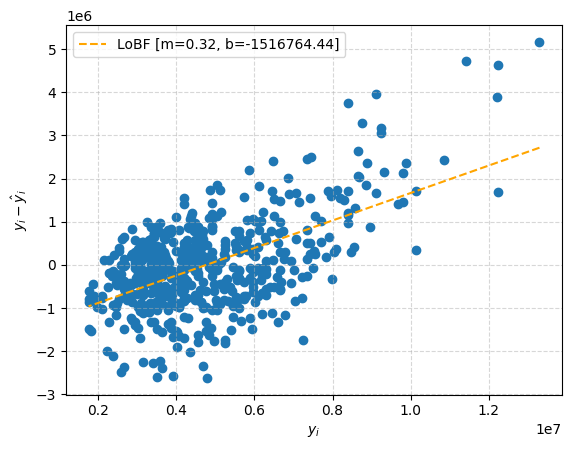

In [26]:
import matplotlib.pyplot as plt
import numpy as np

n = len(fit.resid)
m, b = np.polyfit(y, fit.resid, 1)

line = m*y + b


plt.scatter(y, fit.resid)
plt.plot(y, line, label=f"LoBF [{m=:.2f}, {b=:.2f}]", linestyle="--", color='orange')

plt.xlabel(r"$y_i$")
plt.ylabel(r"$y_i - \hat{y}_i$")

plt.grid(alpha=0.5, linestyle="--")

plt.legend()
plt.show()

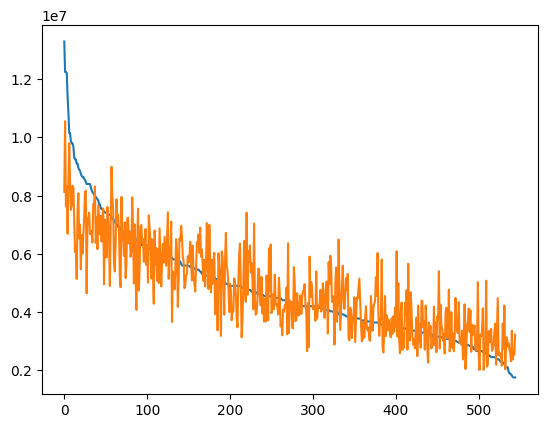

In [27]:
x = np.array([i for i in range(len(y))])
plt.plot(x, y, label=r"y_i")
plt.plot(x, fit.fitted_values, label=r"\hat{y}_i")

In [28]:
fit.fit_error

ErrorMetrics(r2=np.float64(0.681801848554014), r2_adj=np.float64(0.6733966143648749), rmse=np.float64(1054128.892633344), mape=np.float64(0.17193151915655344))